## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 3 csv files in the current version of the dataset:


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


### Let's check 1st file: Machine Hack (MPP_Dataset/Test.csv)

In [4]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('S:/MPP_Dataset/MPP_Dataset/Test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 11 columns


Let's take a quick look at what the data looks like:

In [5]:
df1.head(5)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


Distribution graphs (histogram/bar graph) of sampled columns:

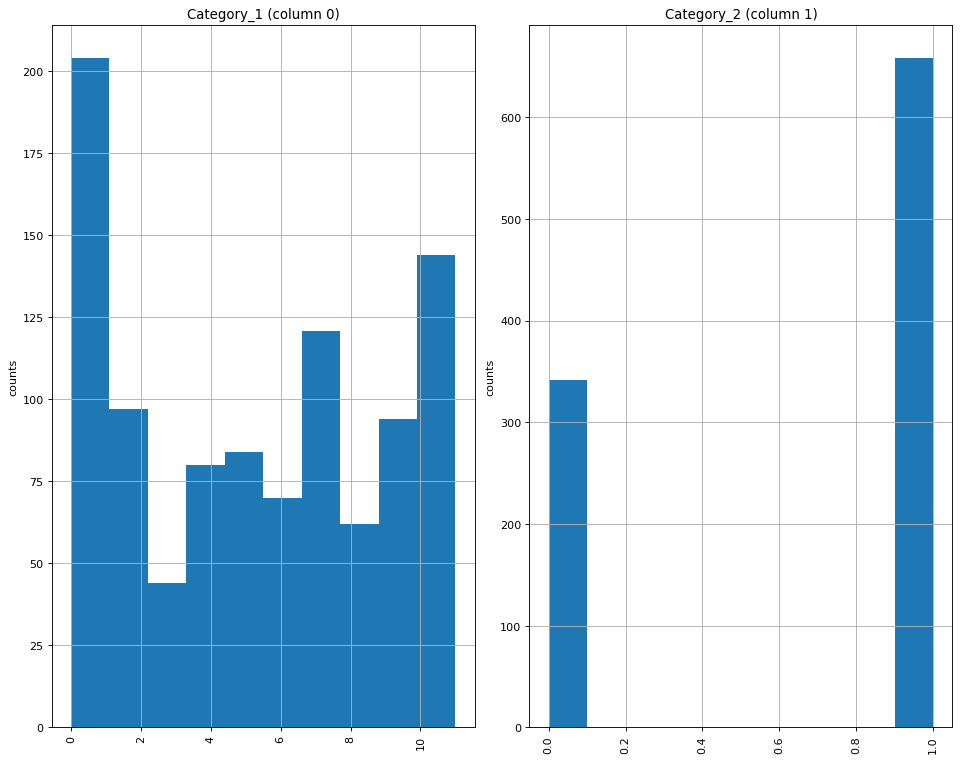

In [6]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

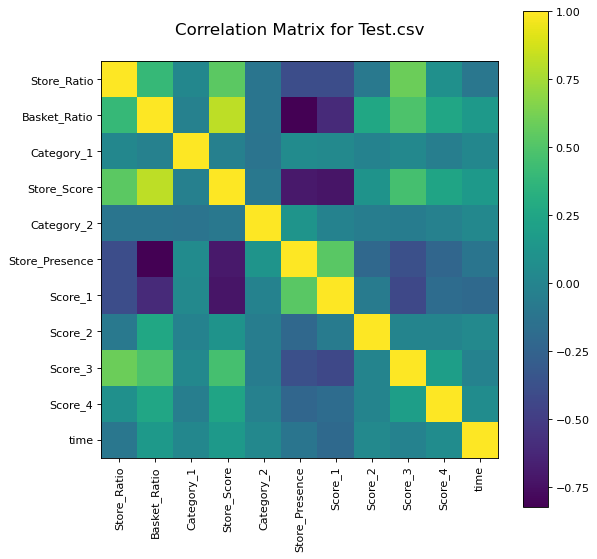

In [7]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

In [8]:
plotScatterMatrix(df1, 20, 10)

NameError: name 'plotScatterMatrix' is not defined

### Let's check 2nd file: Machine Hack (MPP_Dataset/sample_submission.csv)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# sample_submission.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('S:/MPP_Dataset/MPP_Dataset/sample_submission.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'sample_submission.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

Let's take a quick look at what the data looks like:

In [ ]:
df2.head(5)

Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

In [ ]:
plotCorrelationMatrix(df2, 8)

### Let's check 3rd file: Machine Hack (MPP_Dataset/Train.csv)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('S:/MPP_Dataset/MPP_Dataset/Train.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'Train.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

Let's take a quick look at what the data looks like:

In [ ]:
df3.head(5)

Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
plotPerColumnDistribution(df3, 10, 5)

Correlation matrix:

In [ ]:
plotCorrelationMatrix(df3, 8)

Scatter and density plots:

In [ ]:
plotScatterMatrix(df3, 20, 10)

## Conclusion
This concludes my starter analysis! Now will take a next step towards the submission.